# House Price Prediction (Real Estate AI).

## Step 1: Import Libraries and Load Data

In [15]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Loading the dataset
# Please make sure the path is correct
file_path = r"F:\Internship Data\Housing.csv"
print(f"Loading data from: {file_path}")

try:
    df = pd.read_csv(file_path)
    print("Data Loaded Successfully! ✅")
except FileNotFoundError:
    print("Error: Local file not found. Loading from Internet...")
    df = pd.read_csv("https://raw.githubusercontent.com/yasserh/housing-prices-dataset/main/Housing.csv")

# Display first 5 rows
print("\nOriginal Data View:")
print(df.head())

Loading data from: F:\Internship Data\Housing.csv
Data Loaded Successfully! ✅

Original Data View:
      price  area  bedrooms  ...  parking  prefarea furnishingstatus
0  13300000  7420         4  ...        2       yes        furnished
1  12250000  8960         4  ...        3        no        furnished
2  12250000  9960         3  ...        2       yes   semi-furnished
3  12215000  7500         4  ...        3       yes        furnished
4  11410000  7420         4  ...        2        no        furnished

[5 rows x 13 columns]


## Step 2: Data Preprocessing (Encoding & Scaling)

In [ ]:
# --- PART 1: TEXT TO NUMBERS (Encoding) ---
le = LabelEncoder()
text_cols = df.select_dtypes(include=['object']).columns

print(f"Found Text Columns: {list(text_cols)}")

# Special Check for 'furnishingstatus' (Before)
print(f" -> Before Encoding 'furnishingstatus': {df['furnishingstatus'].unique()}")

# Loop to convert all text columns
for col in text_cols:
    df[col] = le.fit_transform(df[col])

# Special Check for 'furnishingstatus' (After)
print(f" -> After Encoding 'furnishingstatus' (0, 1, 2): {df['furnishingstatus'].unique()}")
print("Text to Number Conversion Complete! \n")


# --- PART 2: FEATURE SCALING ---
X = df.drop('price', axis=1)
y = df['price']

# Check before scaling
print(f"Before Scaling (Area vs Bedrooms):\n{X[['area', 'bedrooms']].head(2)}")
print(" -> Note: 'area' is very large compared to 'bedrooms'.\n")

# Apply Standard Scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check after scaling (Converting back to DF just to show you)
X_scaled_check = pd.DataFrame(X_scaled, columns=X.columns)
print(f"After Scaling (Balanced):\n{X_scaled_check[['area', 'bedrooms']].head(2)}")
print(" -> Note: Now both are small numbers. Scaling Successful! ✅")


# --- PART 3: TRAIN TEST SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f"\nData Split Done. Training Size: {X_train.shape[0]}")

## Step 3: Model Training (Gradient Boosting)

In [ ]:
# Initialize the Model
# n_estimators=400: Machine 400 dafa seekhay gi
# max_depth=5: Har dafa gehraayi mein jaye gi
print("Training Gradient Boosting Model... ")
model = GradientBoostingRegressor(n_estimators=400, learning_rate=0.05, max_depth=5, random_state=42)

# Train on Training Data
model.fit(X_train, y_train)

print("Model Training Completed Successfully! ")

Training Gradient Boosting Model... ⏳
Model Training Completed Successfully! 🚀


## Step 4: Performance Evaluation

In [17]:
# Make Predictions on Test Data
y_pred = model.predict(X_test)

# Calculate Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print Final Report
print("-" * 40)
print(" FINAL PERFORMANCE REPORT")
print("-" * 40)
print(f" Accuracy (R2 Score)  : {r2*100:.2f}%")
print(f" Mean Absolute Error  : {mae:,.0f}")
print(f" Root Mean Sq Error   : {rmse:,.0f}")
print("-" * 40)

----------------------------------------
 FINAL PERFORMANCE REPORT
----------------------------------------
 Accuracy (R2 Score)  : 60.97%
 Mean Absolute Error  : 1,022,043
 Root Mean Sq Error   : 1,404,630
----------------------------------------


## Step 5: Visualization (Actual vs Predicted)

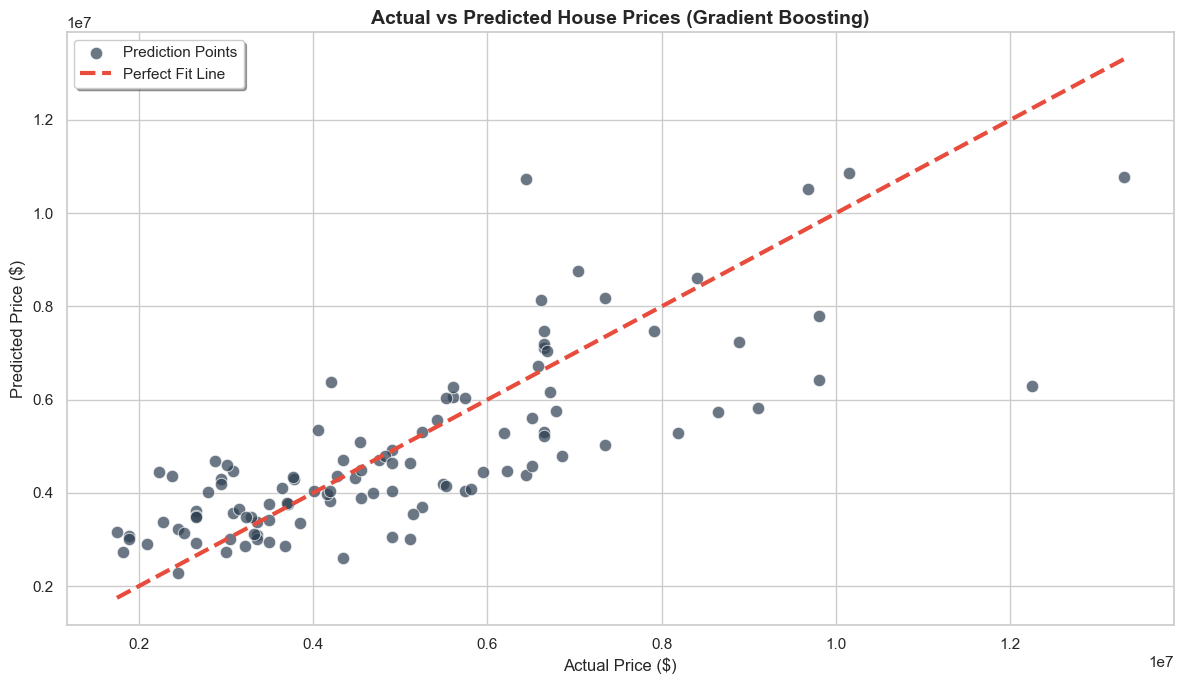

In [18]:
# Set Professional Style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 7))

# 1. Scatter Plot (Predictions)
# Dark Blue color for professional look
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='#2c3e50', edgecolor='w', s=80, label='Prediction Points')

# 2. Perfect Fit Line (The Ideal Scenario)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], color='#e74c3c', linestyle='--', linewidth=3, label='Perfect Fit Line')

# 3. Labels & Titles
plt.xlabel("Actual Price ($)", fontsize=12)
plt.ylabel("Predicted Price ($)", fontsize=12)
plt.title("Actual vs Predicted House Prices (Gradient Boosting)", fontsize=14, fontweight='bold')
plt.legend(frameon=True, fancybox=True, shadow=True)

plt.tight_layout()
plt.show()